In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Data.csv')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
def identify_common_cuisines_combinations(dataset_path):
    cuisine_combination=df['Cuisines'].str.split(',').explode()
    cuisine_combination_counts=cuisine_combination.value_counts()
    return cuisine_combination_counts
dataset_path='restaurants.csv'
common_cuisines_combinations=identify_common_cuisines_combinations(dataset_path)
print('most common combinations of cuisines:')
print(common_cuisines_combinations.head(10))

most common combinations of cuisines:
North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
Name: Cuisines, dtype: int64


determine if certain cuisine combination tend to have higher ratings

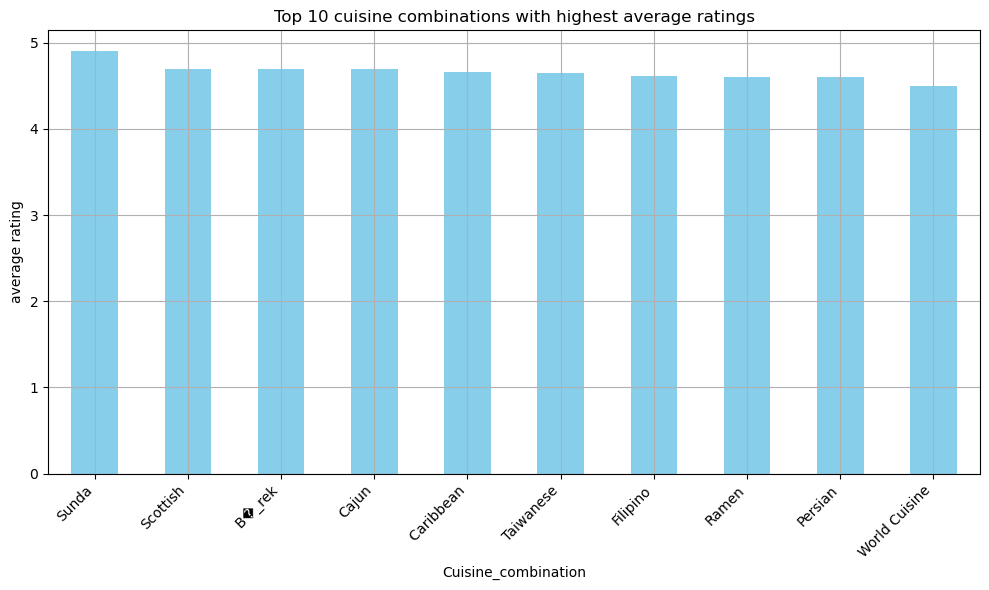

Average ratings for top 10 cuisine combinations:
Cuisine_combination
Sunda            4.900000
Scottish         4.700000
 B�_rek          4.700000
Cajun            4.700000
 Caribbean       4.666667
Taiwanese        4.650000
Filipino         4.616667
Ramen            4.600000
Persian          4.600000
World Cuisine    4.500000
Name: Aggregate rating, dtype: float64


In [5]:
def analyze_Cuisine_combinations_and_ratings(dataset_path):
    df['Cuisine_combination']=df['Cuisines'].str.split(',')
    df_exploded=df.explode('Cuisine_combination')
    average_ratings_by_combination=df_exploded.groupby('Cuisine_combination')['Aggregate rating'].mean()
    sorted_ratings=average_ratings_by_combination.sort_values(ascending=False)
    
    plt.figure(figsize=(10,6))
    sorted_ratings.head(10).plot(kind='bar',color='skyblue')
    plt.xlabel('Cuisine_combination')
    plt.ylabel('average rating')
    plt.title('Top 10 cuisine combinations with highest average ratings') 
    plt.xticks(rotation=45,ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
             
    return sorted_ratings
dataset_path='restaurants.csv'
sorted_ratings=analyze_Cuisine_combinations_and_ratings(dataset_path)
print('Average ratings for top 10 cuisine combinations:')
print(sorted_ratings.head(10))